# Data Science Project Based on Australian Vehicle Prices Dataset

Jane Citizen 40987654

## Dataset Description:

This dataset contains the latest information on car prices in Australia for the year 2023. It covers various brands, models, types, and features of cars sold in the Australian market. It provides useful insights into the trends and factors influencing the car prices in Australia. The dataset includes information such as brand, year, model, car/suv, title, used/new, transmission, engine, drive type, fuel type, fuel consumption, kilometres, colour (exterior/interior), location, cylinders in engine, body type, doors, seats, and price. The dataset has over 16,000 records of car listings from various online platforms in Australia.

* Brand: Name of the car manufacturer
* Year: Year of manufacture or release
* Model: Name or code of the car model
* Car/Suv: Type of the car (car or suv)
* Title: Title or description of the car
* UsedOrNew: Condition of the car (used or new)
* Transmission: Type of transmission (manual or automatic)
* Engine: Engine capacity or power (in litres or kilowatts)
* DriveType: Type of drive (front-wheel, rear-wheel, or all-wheel)
* FuelType: Type of fuel (petrol, diesel, hybrid, or electric)
* FuelConsumption: Fuel consumption rate (in litres per 100 km)
* Kilometres: Distance travelled by the car (in kilometres)
* ColourExtInt: Colour of the car (exterior and interior)
* Location: Location of the car (city and state)
* CylindersinEngine: Number of cylinders in the engine
* B odyType: Shape or style of the car body (sedan, hatchback, coupe, etc.)
* Doors: Number of doors in the car
* Seats: Number of seats in the car
* Price: Price of the car (in Australian dollars)


## AIM:

We would like to predict the price of the car base on the cars' features (e.g. manufacture year, transmission, engine). Meanwhile, we we like to compare the performance of different regresion models.


## Import Libraries

Here we import all the libraries we need.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# this is used for random seed
student_id = 40987654

## Data Loading

We load in the CSV file and print the table head of the source data to check what kind of feature data has been included.

In [5]:
file_csv = "australian_vehicle_prices.csv"
raw = pd.read_csv(file_csv)
print("data shape is : ", raw.shape)
raw.head()

data shape is :  (16734, 19)


,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


It shows that the raw dataset has 16,734 samples, each sample contains 19 values.


We drop the column **Title**, **ColourExtInt** and **Model** because they are irrelevant. The column **Car/Suv** are also dropped because it's overlapping with **BodyType**. Then we check the shape.

In [8]:
data = raw.drop(columns=['Title', 'Car/Suv', 'ColourExtInt', 'Model'])
print(data.shape)

(16734, 15)


We would like to do a further check to see the possible values of each column.

In [10]:
# Loop through each column and print the unique values
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print("\n")

Unique values for column 'Brand':
['Ssangyong' 'MG' 'BMW' 'Mercedes-Benz' 'Renault' 'Toyota' 'Land' 'Nissan'
 'Honda' 'Volkswagen' 'Mitsubishi' 'Ford' 'Subaru' 'Hyundai' 'Jeep'
 'Volvo' 'Mazda' 'Abarth' 'Holden' 'Audi' 'Kia' 'Mini' 'Peugeot' 'Suzuki'
 'Dodge' 'Porsche' 'Daihatsu' 'Isuzu' 'Lexus' 'Jaguar' 'Rolls-Royce'
 'Skoda' 'Fiat' 'Haval' 'Citroen' 'LDV' 'HSV' 'Foton' 'Mahindra'
 'Maserati' 'Alfa' 'GWM' 'Ram' 'Tesla' 'Genesis' 'Chrysler' 'Great' 'Opel'
 'Saab' 'Bentley' 'Rover' nan 'Ferrari' 'Cupra' 'Chevrolet' 'Lamborghini'
 'FPV' 'McLaren' 'Chery' 'Iveco' 'Hummer' 'Infiniti' 'BYD' 'Tata' 'Aston'
 'Daewoo' 'Proton' 'Geely' 'Smart' 'Ineos' 'Caterham' 'Hino'
 'International' 'Lotus' 'Polestar' 'Datsun' 'Packard']


Unique values for column 'Year':
[2022. 2011. 2004. 2017. 2000. 2013. 2014. 2009. 2018. 2015. 2016. 2012.
 2023. 2005. 2019. 2021. 2007. 2010. 2003. 2008. 2006. 2020. 1999. 2002.
 1995. 1997. 1993. 2001. 1998. 1985. 1992.   nan 1986. 1996. 1994. 1989.
 1990. 1981. 1991. 19

As we can see, there are possible '-' in column **Transmission**, **FuelType**, and 'POA' in column **Price**. They are not *NaN* but are meaningless and should be converted to *NaN*.
Meanwhile, one of the value in **Location** is *Warrenheip, AU-VIC*.
As the format is < *Suburb, State* >, we are going to consolidate *AU-VIC* and *VIC* to *VIC*.

In [12]:
data.replace(['-','POA'],np.NAN,inplace=True)

data['Location'] = data['Location'].str.replace('AU-VIC', 'VIC')

Meanwhile, some of the columns are containing strings but could be presented by numerical data.

For example, the unit for **FuelConsumption** is *L/100km*, thus we could only keep the numerical data within the string.

The column **Location** are too specific and won't help with the project. We keep the States only.

The column **Engine** are partially overlapping with **CylindersinEngine**, we keep the displacement in new column **Displacement** and discard the **Engine**.

### Original

In [15]:
# perform string manipulation then convert to numeric value
data['FuelConsumption'] = data['FuelConsumption'].str.split('/').str[0].str.split().str[0]
data['FuelConsumption'] = pd.to_numeric(data['FuelConsumption'], errors='coerce') # we use 'coerce' to keep NaN

# perform string manipulation
data['Location'] = data['Location'].str.split(',').str[1].str.strip()

# perform string manipulation then convert to numeric value
data['Displacement'] = data['Engine'].str.split(',').str[1].str.split().str[0]
data['Displacement'] = pd.to_numeric(data['Displacement'], errors='coerce')
data.drop(columns=['Engine'], inplace=True)

# perform string manipulation then convert to numeric value
data['CylindersinEngine'] = data['CylindersinEngine'].str.split().str[0]
data['CylindersinEngine'] = pd.to_numeric(data['CylindersinEngine'], errors='coerce')

# perform string manipulation then convert to numeric value
data['Seats'] = data['Seats'].str.split().str[0]
data['Seats'] = pd.to_numeric(data['Seats'], errors='coerce')

# convert to numeric value
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# convert to numeric value
data['Kilometres'] = pd.to_numeric(data['Kilometres'], errors='coerce')

We check the shape and the percentage of missing data.

In [17]:
# Clean and convert 'Doors' feature to numeric, ensuring consistency in formatting
data['Doors'] = data['Doors'].str.replace(' Doors', '').str.strip()  # Remove textual suffix and white spaces
data['Doors'] = pd.to_numeric(data['Doors'], errors='coerce')  # Coerce to numeric, converting non-convertible entries to NaN

# Check for unique values in 'Doors' after cleaning
unique_doors = data['Doors'].unique()
print("Unique values for 'Doors' after cleaning:", unique_doors)

Unique values for 'Doors' after cleaning: [ 4.  5.  2. nan  3.]


In [18]:
print("Data shape:", data.shape)
print("Percentage of data missing from each column")
data.isnull().sum()/len(data)*100

Data shape: (16734, 15)
Percentage of data missing from each column


Brand                 0.005976
Year                  0.005976
UsedOrNew             0.005976
Transmission          1.505916
DriveType             0.005976
FuelType              3.812597
FuelConsumption      10.147006
Kilometres            3.537708
Location              2.689136
CylindersinEngine    10.009561
BodyType              1.685192
Doors                10.009561
Seats                10.188837
Price                 0.316720
Displacement         10.654954
dtype: float64

We would like to drop the null values. However, column **FuelConsumption**, **CylindersinEngine**, **Doors**, **Seats** and **Displacement** have more than 5% data missing, so we cannot drop them since it will lose a lot of information from the data, we fill them with the average value of that column respectively.

### Revised Snippet:

In [21]:
# Fill missing values for relevant columns instead of dropping

data['FuelConsumption'].fillna(data['FuelConsumption'].mean(), inplace=True)

data['CylindersinEngine'].fillna(data['CylindersinEngine'].mean(), inplace=True)

data['Doors'].fillna(data['Doors'].mean(), inplace=True)

data['Seats'].fillna(data['Seats'].mean(), inplace=True)

### Original Snippet:

In [23]:
data.dropna(inplace=True)
print("Data shape after processing the missing value:", data.shape)

Data shape after processing the missing value: (14197, 15)


## Visualisation

We would like to perform some visualisation. The following cells are rendering some figures for the analysis.

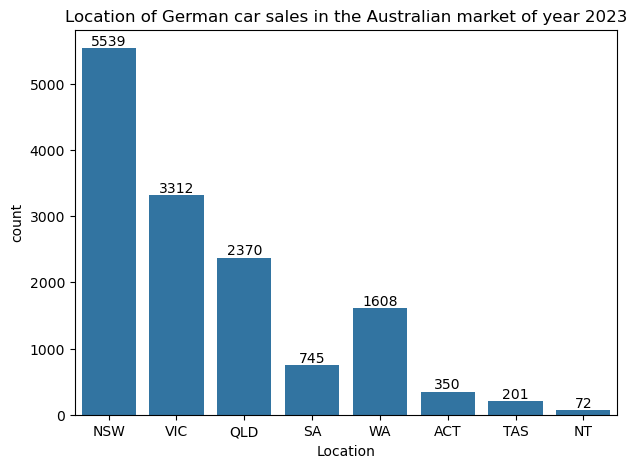

In [25]:
plt.figure(figsize=(7,5))
ax = sns.countplot(data=data, x='Location')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Location of German car sales in the Australian market of year 2023')
plt.show()

We can see most of the cars were selling in NSW back in 2023, which aligns with the population distribution of Australia. [[Source]](https://www.worldatlas.com/articles/the-largest-states-and-territories-of-australia.html)

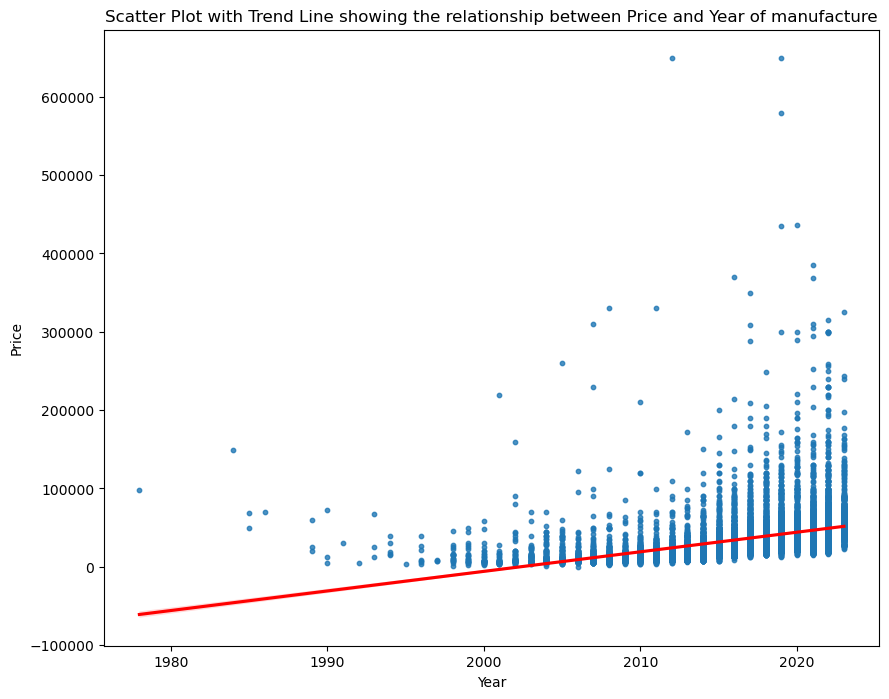

In [27]:
plt.figure(figsize=(10,8))
sns.regplot(data=data, x='Year', y='Price', scatter_kws={'s': 10}, line_kws={"color": "red"})
plt.title('Scatter Plot with Trend Line showing the relationship between Price and Year of manufacture')
plt.show()

We can see the trends of the rising price accompanied with the newer  manufacturing year.

This also aligns with our common sense, *i.e.* the newer the car the higher the price.

## Encoding

We encode the categorical features to integers with OrdinalEncoder and drop the original column for simplicity.

In [30]:
ord_enc = OrdinalEncoder(dtype=int)

data["BrandCode"] = ord_enc.fit_transform(data[["Brand"]])
data["UsedCode"] = ord_enc.fit_transform(data[["UsedOrNew"]])
data["TransmissionCode"] = ord_enc.fit_transform(data[["Transmission"]])
data["DriveTypeCode"] = ord_enc.fit_transform(data[["DriveType"]])
data["FuelTypeCode"] = ord_enc.fit_transform(data[["FuelType"]])
data["LocationCode"] = ord_enc.fit_transform(data[["Location"]])
data["BodyTypeCode"] = ord_enc.fit_transform(data[["BodyType"]])

In [31]:
# Drop the categorical columns
clean = data.drop(
    columns=['Brand', 'UsedOrNew', 'Transmission', 'DriveType',
             'FuelType', 'Location', 'BodyType'])

Now this ```clean``` will be used for following tasks. We check the shape and statistic info.

In [33]:
print(clean.shape)
clean.describe(include="all")

(14197, 15)


,Year,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price,Displacement,BrandCode,UsedCode,TransmissionCode,DriveTypeCode,FuelTypeCode,LocationCode,BodyTypeCode
count,14197.000000,14197.000000,14197.000000,14197.000000,14197.000000,14197.000000,14197.000000,14197.000000,14197.000000,14197.000000,14197.000000,14197.000000,14197.000000,14197.000000,14197.000000
mean,2016.083539,7.793520,101673.812918,4.455801,4.019018,5.123688,34417.380503,2.416172,37.653166,1.917518,0.118828,1.645982,3.090089,3.374375,5.820385
std,4.881975,2.135737,77857.400175,1.052494,0.671590,1.095175,28192.629756,0.868230,16.774691,0.358491,0.323597,1.221021,2.206572,2.380908,1.972693
min,1978.000000,0.000000,1.000000,2.000000,2.000000,2.000000,88.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,6.600000,43761.000000,4.000000,4.000000,5.000000,18888.000000,2.000000,25.000000,2.000000,0.000000,1.000000,0.000000,1.000000,6.000000
50%,2017.000000,7.600000,86454.000000,4.000000,4.000000,5.000000,28787.000000,2.200000,39.000000,2.000000,0.000000,2.000000,4.000000,3.000000,6.000000
75%,2020.000000,8.800000,148039.000000,4.000000,4.000000,5.000000,41990.000000,2.800000,56.000000,2.000000,0.000000,2.000000,5.000000,6.000000,7.000000
max,2023.000000,27.000000,526162.000000,12.000000,5.000000,22.000000,649880.000000,7.300000,61.000000,2.000000,1.000000,4.000000,5.000000,7.000000,9.000000


We also plot the feature distribution to observe the value distribution of each feature.

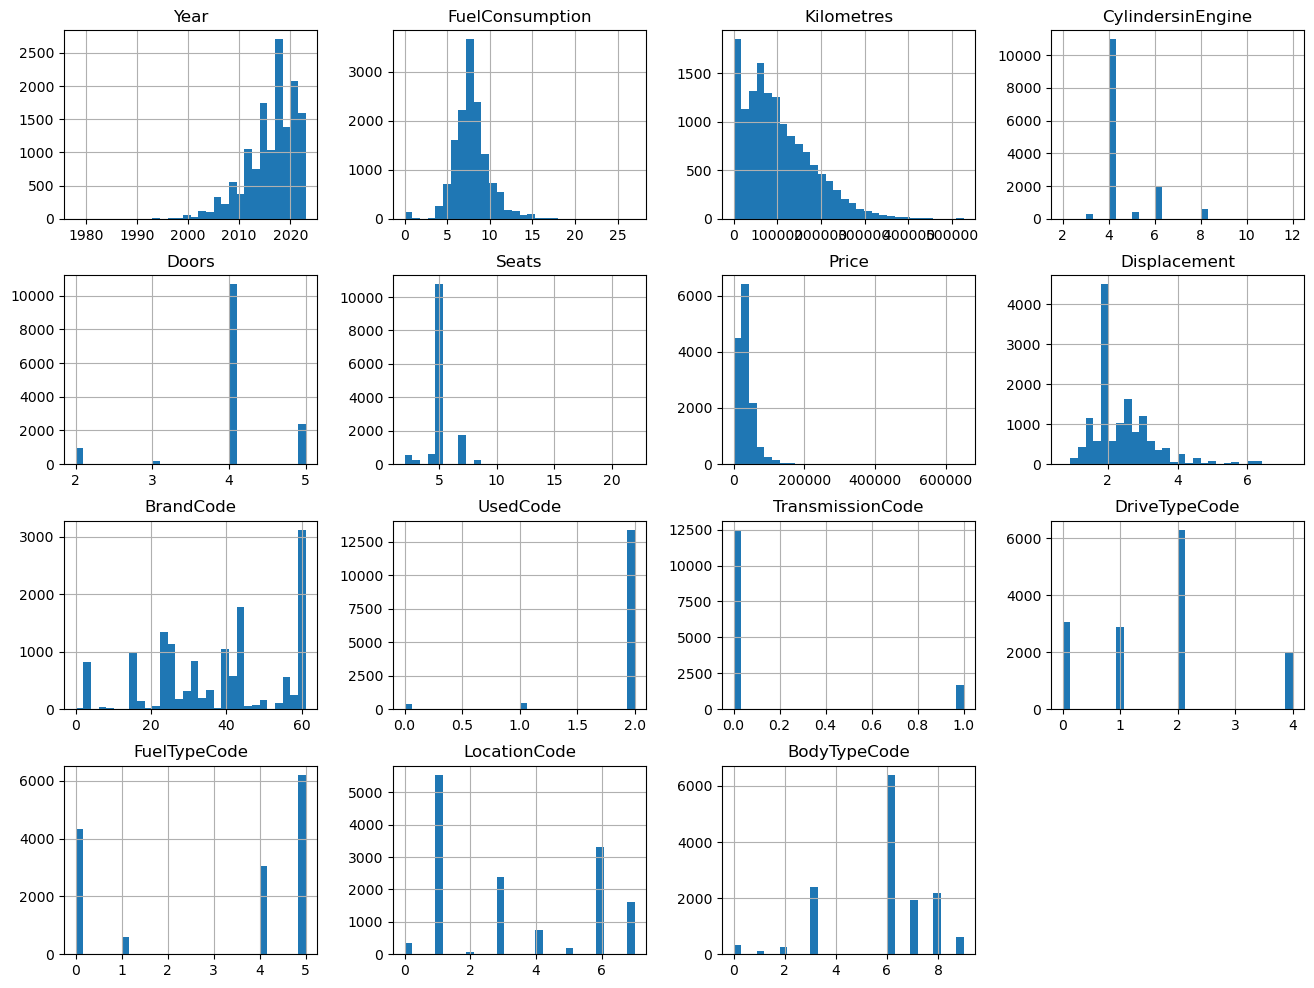

In [35]:
clean.hist(bins=30 ,figsize=(16,12))
plt.show()

## Feature Selection & Data Splitting

We first study the correlation between the price and other features.

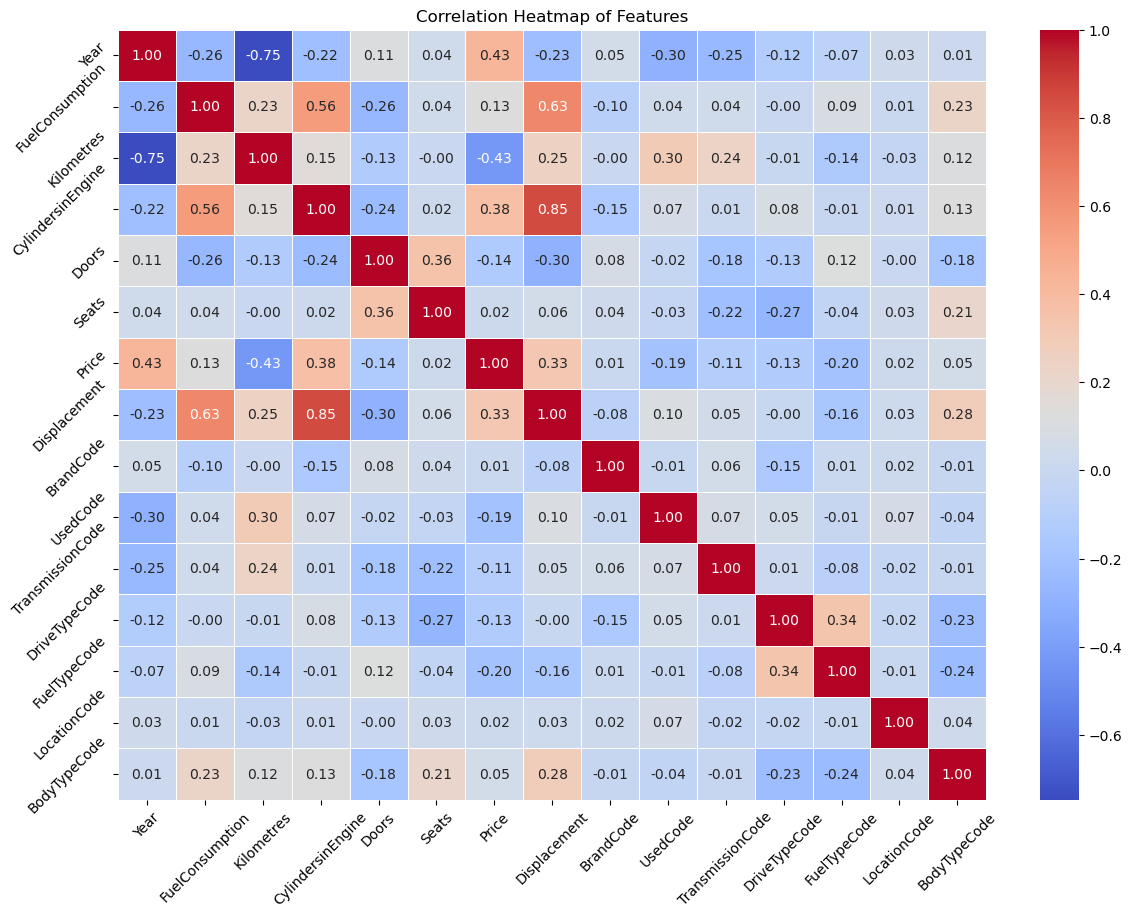

In [38]:
plt.figure(figsize=(14, 10))
sns.heatmap(clean.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Then we keep the 5-top most correlated features and split the dataset. We want the training set the size of 80% of full dataset.

In [40]:
X = clean[['Kilometres','Year','Displacement','CylindersinEngine','FuelConsumption']]
y = clean['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=student_id)

## Model Training & Evaluating

We then train and evaluate several models.

### Linear Regression (LR)

We perform linear regression to check the performance.
As overfitiing and underftiitng will both decrease the model performance, we would like to avoid them.

In [43]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [44]:
# evaluate testing set
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("The results for testing set with LR:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

The results for testing set with LR:
MSE: 542289288.84353
Root MSE: 23287.105634739797
R^2: 0.4381327058578752


### Decision Tree Regression (DTR)

We perform decision tree regression to check the performance. We want to tune the model so that it's not overfitting nor underfitting.

In [69]:
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [47]:
# evaluate testing set
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("The results for testing set with DTR:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

The results for testing set with DTR:
MSE: 639786891.5874575
Root MSE: 25294.009005838863
R^2: 0.33711519478754226


In [48]:
# evaluate training set
y_pred = regressor.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)
print("The results for training set with DTR:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

The results for training set with DTR:
MSE: 477459804.80115074
Root MSE: 21850.853640101814
R^2: 0.36514363934091043


As the performance on training is higher then testing set , we can say it is overfitting.

### Multi-Layer Perceptron (MLP)

We then deploy a MLP regressior and try to capture the inner non-linear relationship.

We would like a double hidden-layer structure with 100 and 100 for each layer respectively.

To save the calculation time, we would like to set the max_iteration as 1000.

In [51]:
regressor = MLPRegressor(
    solver='adam',
    activation='identity',
    alpha=0.0001,
    random_state=student_id,
    hidden_layer_sizes=(100,100),
    max_iter=1000
)

regressor.fit(X_train, y_train)

MLPRegressor(activation='identity', hidden_layer_sizes=(100, 100),
             max_iter=1000, random_state=40987654)

In [60]:
# evaluate testing set
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("The results for testing set with MLP:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

The results for testing set with MLP:
MSE: 798506179.6768041
Root MSE: 28257.851646521256
R^2: 0.17266574177122618


In [62]:
# evaluate training set
y_pred = regressor.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)
print("The results for training set with MLP:")
print("MSE:", mse)
print("Root MSE:", rmse)
print("R^2:", r2)

The results for training set with MLP:
MSE: 607688346.7701479
Root MSE: 24651.33559809991
R^2: 0.19198473177002162


### Revised Snippet:

In [64]:
# Explicitly identify which model is being evaluated

print("The results for training set with MLP Regressor:")

print("MSE:", mse)

print("Root MSE:", rmse)

print("R^2:", r2)


The results for training set with MLP Regressor:
MSE: 607688346.7701479
Root MSE: 24651.33559809991
R^2: 0.19198473177002162


In [75]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error for each model
lr_mse = mean_squared_error(y_train, y_pred)
dtr_mse = mean_squared_error(y_train, y_pred)
mlp_mse = mean_squared_error(y_train, y_pred)

# Print MSE values for reference
print(f"Linear Regression MSE: {lr_mse}")
print(f"Decision Tree Regression MSE: {dtr_mse}")
print(f"Multi-Layer Perceptron MSE: {mlp_mse}")

# Include justification for model choice based on performance metrics
if dtr_mse < lr_mse and dtr_mse < mlp_mse:
    print("Decision Tree Regressor (DTR) demonstrates the best performance as it captures non-linearity better.")
elif lr_mse < dtr_mse and lr_mse < mlp_mse:
    print("Linear Regression (LR) demonstrates the best performance, suggesting a strong linear relationship.")
else:
    print("Multi-Layer Perceptron (MLP) demonstrates the best performance, revealing complex relationships in the data.")

Linear Regression MSE: 607688346.7701479
Decision Tree Regression MSE: 607688346.7701479
Multi-Layer Perceptron MSE: 607688346.7701479
Multi-Layer Perceptron (MLP) demonstrates the best performance, revealing complex relationships in the data.


As the performance of training set and testing set are similar, we can say it is not overfitting.

## Analysis

According to the result we have, among these three models (LR, DTR and MLP) the best option for this dataset is DTR. However, the releationships among the features within this dataset are not obvious for these models to catch, thus all the performance are not very satisfying. We might need to further clean the data (*e.g.* remove outliers) or deploy deep learning models for the prediction.